In [2]:
import numpy
from scipy.stats import sigmaclip
from matplotlib import pylab


In [3]:
fin_eq28yy=numpy.load("/rds/project/bn204/rds-bn204-asterics/jck42/BiSpectrum/Binned_Data_IDR2/EQ28/YY/output_bin.npz")
fin_linewyy=numpy.load("/rds/project/bn204/rds-bn204-asterics/jck42/BiSpectrum/Binned_Data_IDR2/LinEW/YY/output_bin.npz")

dd_eq28yy = fin_eq28yy['closures']
dd_linewyy = fin_linewyy['closures']

In [4]:
%run procps.py
%run plotprelude.py

In [5]:
#Medians for Equilateral 14m triads
pp_eq28_1_yy=mdays(dd_eq28yy[:,0:8], 1)
pp_eq28_2_yy=mdays(dd_eq28yy[:,8:], 1)
pp_eq28_yy=numpy.concatenate((pp_eq28_1_yy, pp_eq28_2_yy), axis=1)       

#Medians for every other Linear East-West Triads
pp_linew_1_yy=mdays(dd_linewyy[:,0:8], 1)
pp_linew_2_yy=mdays(dd_linewyy[:,8:], 1)
pp_linew_yy=numpy.concatenate((pp_linew_1_yy, pp_linew_2_yy), axis=1)

# YY Polarisations

/home/jck42/conda/lib/python2.7/site-packages/scipy/signal/spectral.py:1623: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/home/jck42/conda/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


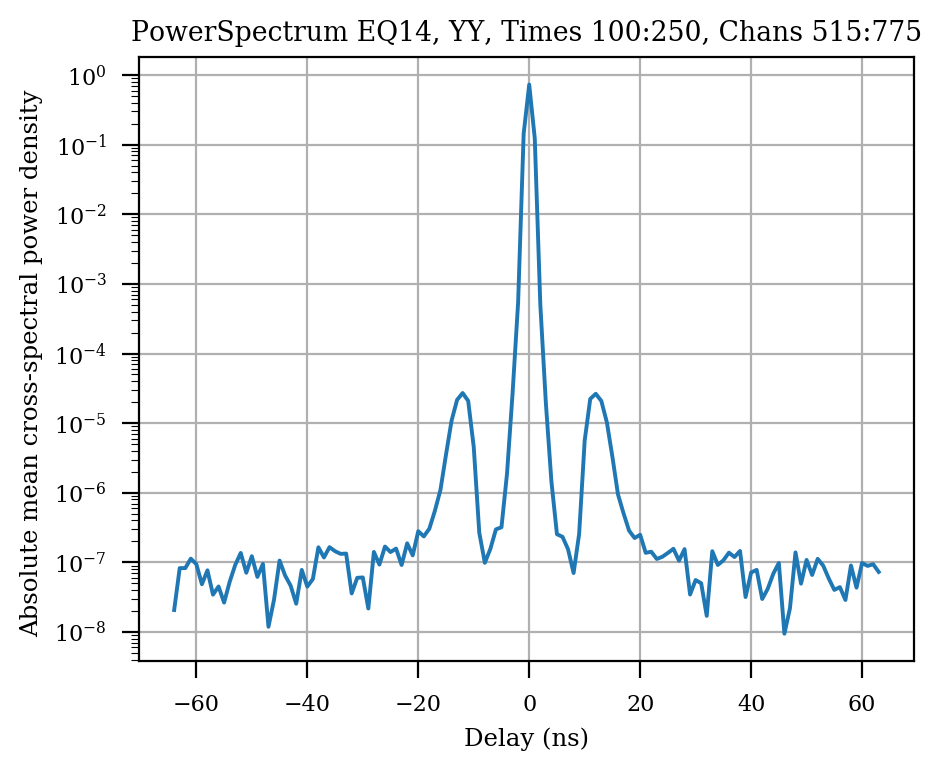

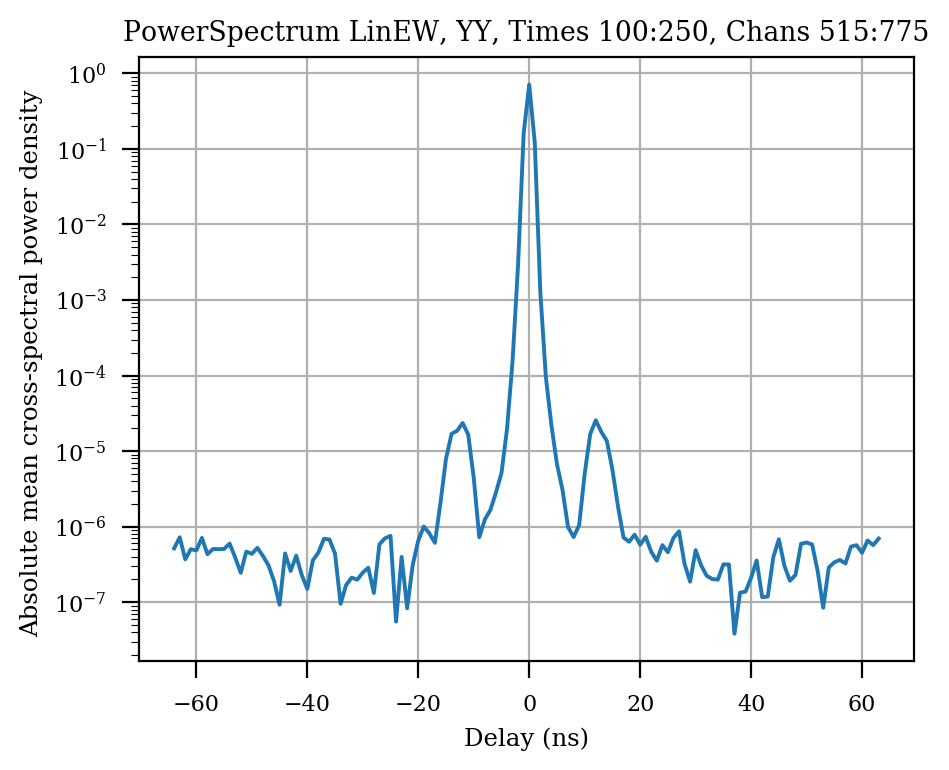

In [6]:
# High Channel Range
w
pp_ps(x1,title="EQ14, YY, Times 100:250, Chans 515:775")
x1=psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:225,:,:,515:775])),
                       window="hamming")
pp_ps(x1,title="LinEW, YY, Times 100:250, Chans 515:775")

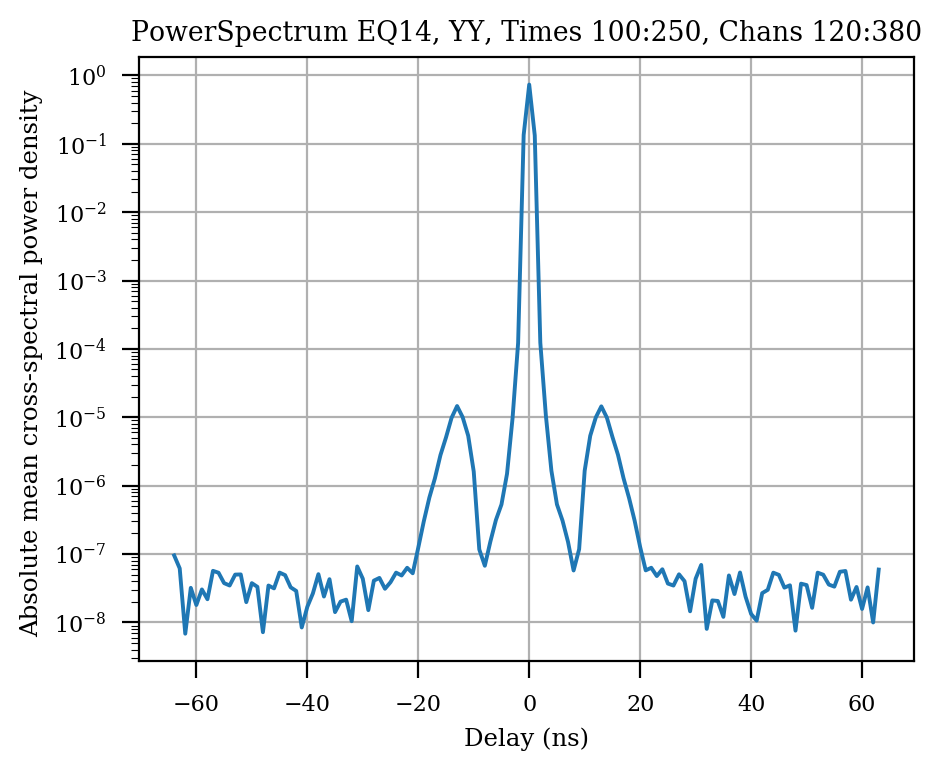

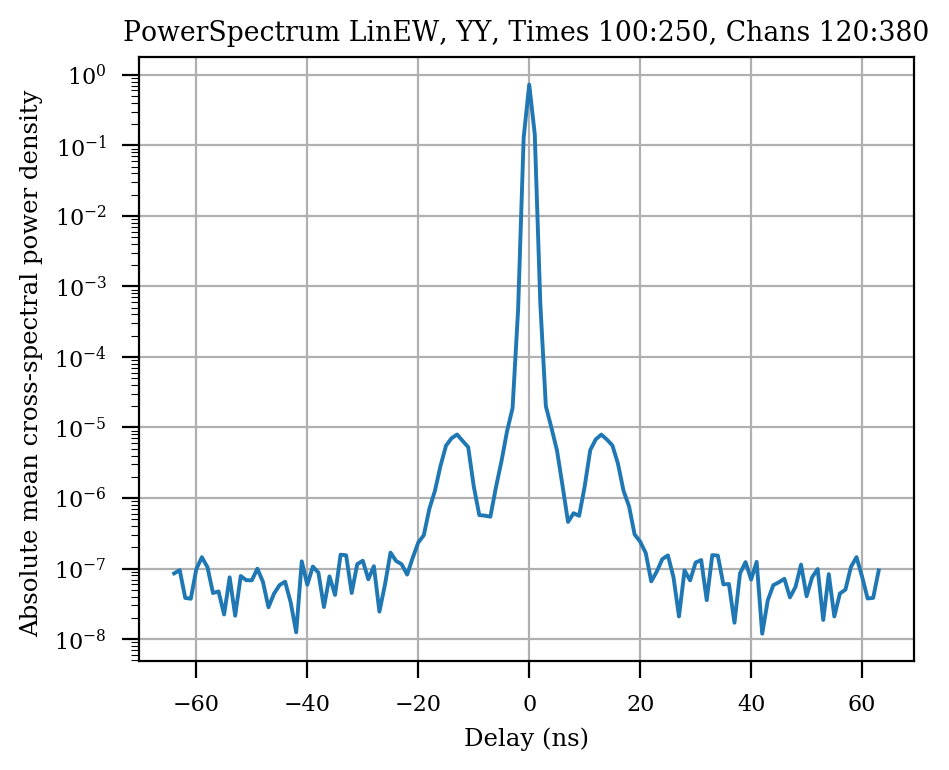

In [7]:
# Low Channel Range
x1=psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[125:225,:,:,120:380])),
                       window="hamming")
pp_ps(x1,title="EQ14, YY, Times 100:250, Chans 120:380")
x1=psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:225,:,:,120:380])),
                       window="hamming")
pp_ps(x1,title="LinEW, YY, Times 100:250, Chans 120:380")

# Plots

## Aggregate All Together

This shows that the lower band is definitively better except for the m30 triads, clearly some weird systematic going on there. 

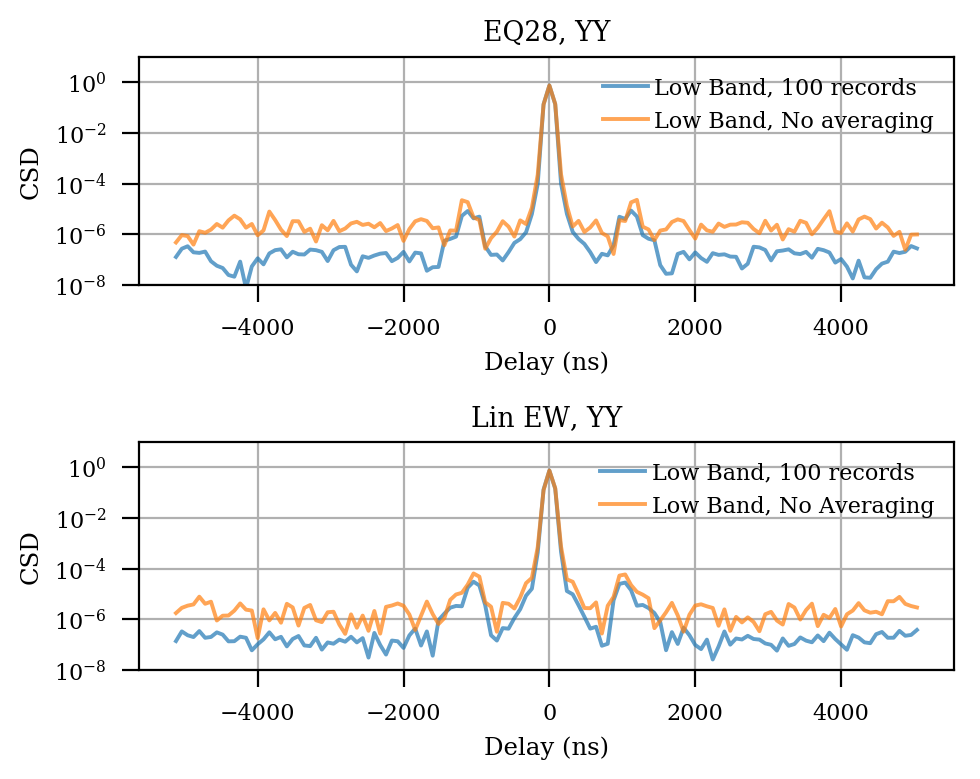

In [8]:
low_eq28 = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[125:225,:,10:11,120:380])),
                       window="hamming")
high_eq28 = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[125:225,:,10:11,515:775])),
                          window="hamming")
low_eq28_noav = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[125:126,:,10:11,120:380])),
                       window="hamming")
high_eq28_noav = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[125:126,:,10:11,515:775])),
                          window="hamming")


low_linew = psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:225,:,10:11,120:380])),
                       window="hamming")
high_linew = psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:225,:,10:11,515:775])),
                          window="hamming")
low_linew_noav = psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:126,:,10:11,120:380])),
                       window="hamming")
high_linew_noav = psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:126,:,10:11,515:775])),
                          window="hamming")


fig=mkfig()

ax=fig.add_subplot(211)
xvar = (numpy.arange(128)-64)*80
pylab.semilogy(xvar,low_eq28,label = 'Low Band, 100 records',alpha=0.7)
pylab.semilogy(xvar,low_eq28_noav,label = 'Low Band, No averaging',alpha=0.7)
ax.set_xlabel("Delay (ns)")
ax.set_ylabel("CSD")
ax.set_title("EQ28, YY")
ax.set_ylim([10e-9,10e0])
ax.legend(loc=0)
ax.xaxis.set_ticks_position('bottom')
ax.grid()
ax2=fig.add_subplot(212,sharex=ax)
pylab.semilogy(xvar,low_linew,label = 'Low Band, 100 records',alpha=0.7)
pylab.semilogy(xvar,low_linew_noav,label = 'Low Band, No Averaging',alpha=0.7)
ax2.set_xlabel("Delay (ns)")
ax2.set_ylabel("CSD")
ax2.set_title("Lin EW, YY")
ax2.set_ylim([10e-9,10e0])
ax2.legend(loc=0)
ax2.xaxis.set_ticks_position('bottom')
ax2.grid()


fig.tight_layout()
pylab.savefig('averaging.pdf')



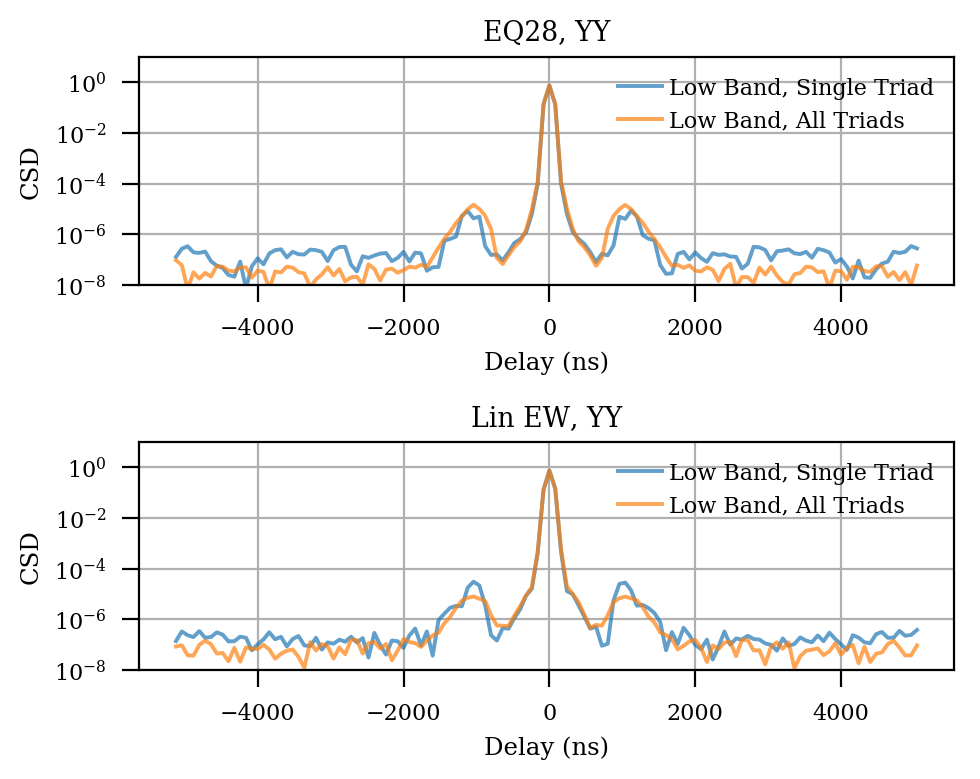

In [9]:
low_eq28_triads = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[125:225,:,:,120:380])),
                       window="hamming")
#high_eq28 = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[125:225,:,:,515:775])),
#                          window="hamming")
#low_eq28_noav = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[125:126,:,:,120:380])),
#                       window="hamming")
#high_eq28_noav = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[125:126,:,:,515:775])),
#                          window="hamming")


low_linew_triads = psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:225,:,:,120:380])),
                       window="hamming")
#high_linew = psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:225,:,:,515:775])),
#                          window="hamming")
#low_linew_noav = psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:126,:,:,120:380])),
#                       window="hamming")
#high_linew_noav = psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:126,:,:,515:775])),
#                          window="hamming")


fig=mkfig()

ax=fig.add_subplot(211)
xvar = (numpy.arange(128)-64)*80
pylab.semilogy(xvar,low_eq28,label = 'Low Band, Single Triad',alpha=0.7)
pylab.semilogy(xvar,low_eq28_triads,label = 'Low Band, All Triads',alpha=0.7)
ax.set_xlabel("Delay (ns)")
ax.set_ylabel("CSD")
ax.set_title("EQ28, YY")
ax.set_ylim([10e-9,10e0])
ax.legend(loc=0)
ax.xaxis.set_ticks_position('bottom')
ax.grid()
ax2=fig.add_subplot(212,sharex=ax)
pylab.semilogy(xvar,low_linew,label = 'Low Band, Single Triad',alpha=0.7)
pylab.semilogy(xvar,low_linew_triads,label = 'Low Band, All Triads',alpha=0.7)
ax2.set_xlabel("Delay (ns)")
ax2.set_ylabel("CSD")
ax2.set_title("Lin EW, YY")
ax2.set_ylim([10e-9,10e0])
ax2.legend(loc=0)
ax2.xaxis.set_ticks_position('bottom')
ax2.grid()


fig.tight_layout()
pylab.savefig('averaging_triads.pdf')

# Now average over every time and triad (incoherently) after coherent median of days. 

In [12]:
pp_eq28_sigclip = pp_eq28_yy.copy()
pp_eq28_sigclip = sigmaclip(pp_eq28_sigclip,low=3.0,high=3.0)


SigmaclipResult(clipped=array([0., 0., 0., ..., 0., 0., 0.]), lower=-0.8525788051154352, upper=0.6640005113703157)


In [14]:
print(pp_eq28_sigclip)[0]

[0. 0. 0. ... 0. 0. 0.]


In [13]:
low_eq28_everything = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[:,:,:,120:380])),
                       window="hamming")
low_eq28_sigmaclip = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_sigclip[:,:,:,120:380][0])),
                       window="hamming")
print(low_eq28_everything.shape)
fig=mkfig()

ax=fig.add_subplot(211)
xvar = (numpy.arange(128)-64)*80
pylab.semilogy(xvar,low_eq28,label = 'Low Band, Single Triad',alpha=0.7)
pylab.semilogy(xvar,low_eq28_triads,label = 'Low Band, All Triads',alpha=0.7)
pylab.semilogy(xvar,low_eq28_everything,label = 'Low Band, All Times/Tris',alpha=0.7)
ax.set_xlabel("Delay (ns)")
ax.set_ylabel("CSD")
ax.set_title("EQ28, YY")
ax.set_ylim([10e-9,10e0])
ax.legend(loc=0)
ax.xaxis.set_ticks_position('bottom')
ax.grid()

fig.tight_layout()
pylab.savefig('averaging_triads.pdf')

TypeError: tuple indices must be integers, not tuple

# Coherently averaging triads

In [ ]:
def psXmedCTimCohTri(dcm, window="hann"):
    

    dcm1 = mtriads(dcm[:,0,:],1)
    dcm2 = mtriads(dcm[:,1,:],1)
    
    
    ps=scipy.signal.csd(numpy.exp(1j*dcm1),
                        numpy.exp(1j*dcm2),
                        nperseg=128,
                        detrend=None,
                           window = window) 
    print(ps[1].shape)
    CTri=numpy.mean(ps[1], axis=0)
    #CTri=numpy.mean(CTim,
    #                axis=0)
    print(CTri.shape)
    return numpy.fft.fftshift(numpy.abs(CTri))/128

eq_28_yy_coherently_average_triads = psXmedCTimCohTri(pp_eq28_yy[125:225,:,:,120:380])
print(eq_28_yy_coherently_average_triads.shape)

pylab.semilogy(xvar,low_eq28)
pylab.semilogy(xvar,eq_28_yy_coherently_average_triads[0,:])

# Try replicating Nithya's Method

Nithya does the following:

1) Coherently average across 60s.
2) Takes an average across two 9-day LST bins.
3) Computes the cross-spectral density between random triads (NOT the same triads as we are)
4) Averages power spectra over 60s coherent records. 

I take issue with 3 due to the non-redundancy. Let's try and replicate.

In [ ]:
eq28yy_nt = fin_eq28yy['closures']



In [ ]:
pp_eq28_yy_flag = pp_eq28_yy.copy()
pp_linew_yy_flag = pp_linew_yy.copy()

pp_eq28_yy_flag[:,:,:,210] = 0.0
pp_linew_yy_flag[:,:,:,210] = 0.0

low_eq28 = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy[125:225,:,:,120:380])),
                       window="hamming")
print(low_eq28.shape)
low_eq28_flag = psXmedCTimCTri(numpy.exp(1j*(pp_eq28_yy_flag[125:225,:,:,120:380])),
                       window="hamming")

low_linew = psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy[125:225,:,:,120:380])),
                       window="hamming")
low_linew_flag = psXmedCTimCTri(numpy.exp(1j*(pp_linew_yy_flag[125:225,:,:,120:380])),
                       window="hamming")


fig=mkfig()

ax=fig.add_subplot(211)
xvar = (numpy.arange(128)-64)*80
pylab.semilogy(xvar,low_eq28,label = 'No Flag',alpha=0.7)
pylab.semilogy(xvar,low_eq28_flag,label = 'Single zeroed record',alpha=0.7)
ax.set_xlabel("Delay (ns)")
ax.set_ylabel("CSD")
ax.set_title("EQ28, YY")
ax.set_ylim([10e-9,10e0])
ax.legend(loc=0)
ax.xaxis.set_ticks_position('bottom')
ax.grid()
ax2=fig.add_subplot(212,sharex=ax)
pylab.semilogy(xvar,low_linew,label = 'No Flag',alpha=0.7)
pylab.semilogy(xvar,low_linew_flag,label = 'Single zeroed record',alpha=0.7)
ax2.set_xlabel("Delay (ns)")
ax2.set_ylabel("CSD")
ax2.set_title("Lin EW, YY")
ax2.set_ylim([10e-9,10e0])
ax2.legend(loc=0)
ax2.xaxis.set_ticks_position('bottom')
ax2.grid()


fig.tight_layout()
pylab.savefig('flagged.pdf')